<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text analysis

This notebook considers the analysis of text in R. 

For more information on all the techniques and packages available in this area, please refer to:

Text Analysis in R by Kasper Welbers, Wouter Van Atteveldt, and Kenneth Benoit (Institute for Media Studies, University of Leuven, Leuven, Belgium; bDepartment of Communcation Science, VU University Amsterdam, Amsterdam, The Netherlands; cDepartment of Methodology, London School of Economics and Political Science, London, UK)

In this notebook we make use of Dutch 'troonredes' (yearly speech by the King or Queen) as our toy dataset for exploring the different options available when working with text in R.


In [20]:
install.packages('quanteda')
install.packages('tokenizers')
install.packages('tm')
install.packages('ggplot2')
install.packages('corrplot')

library(quanteda)
library(tokenizers)
library(tm)
library(ggplot2)
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Loading the data

The data can be directly downloaded from github and contains 36 speeches.

In [21]:
troonredes <- read.csv("https://raw.githubusercontent.com/Jlokkerbol/masterclass/main/troonredes.csv")
head(troonredes,1)

Tekst                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

## Preparing the data

We first change our troonredes-file into a corpus object, such that we can apply the dfm function to it, converting the corpus into a document (rows) feature (columns) matrix, where we take out any capital letters (lower = TRUE) and remove Dutch stopwords and punctuation. 

This gives us a document-feature matrix with 36 documents, and 7,419 features.

In [22]:
troonredes$Tekst <- gsub("<.*?>", "", troonredes$Tekst)
corp <- corpus(troonredes, text_field = "Tekst")
dtm <- dfm(troonredes$Tekst, tolower = TRUE, stem = FALSE,
           remove = stopwords("dutch"), remove_punct = TRUE)
dtm

Warning message:
“'dfm.character()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”
Warning message:
“'stem' is deprecated; use dfm_wordstem() instead”


Document-feature matrix of: 36 documents, 6,903 features (88.56% sparse) and 0 docvars.
       features
docs    leden staten-genera regeringsverklar kabinet twee jaar geleden beleid
  text1     2             2                1       4    2   11       2      2
  text2     2             2                0       0    2   10       0      6
  text3     4             2                0       2    0   13       1      4
  text4     2             2                0       1    1    8       1      4
  text5     3             2                0       0    0   15       2      7
  text6     2             2                0       3    1    4       1      0
       features
docs    uiteengezet komen
  text1           2     6
  text2           0     3
  text3           0     8
  text4           0     3
  text5           0     7
  text6           0     3
[ reached max_ndoc ... 30 more documents, reached max_nfeat ... 6,893 more features ]

By applying stemming to all the features, we make comparable words identical, thereby reducing the number of features quite significantly down to 3,222. The lower the number of features, the less statistical analyses will suffer from the curse of high dimensionality.

In [23]:
dtm <- dfm_wordstem(dtm, language = "dutch")
dtm
class(dtm)

Document-feature matrix of: 36 documents, 6,097 features (87.78% sparse) and 0 docvars.
       features
docs    led staten-genera regeringsverklar kabinet twee jar geled beleid
  text1   2             2                1       4    2  16     2      2
  text2   2             2                0       0    2  16     1      6
  text3   4             2                0       2    0  16     1      4
  text4   2             2                0       1    1  11     1      4
  text5   3             2                0       0    0  23     3      7
  text6   2             2                0       3    1  12     1      0
       features
docs    uiteengezet kom
  text1           2   6
  text2           0   3
  text3           0   8
  text4           0   3
  text5           0   7
  text6           0   3
[ reached max_ndoc ... 30 more documents, reached max_nfeat ... 6,087 more features ]

[1] "dfm"
attr(,"package")
[1] "quanteda"

#Filtering

We can further reduce the number of features by filtering out the features that have a frequency of 2 or lower. This reduces the number of features further down to 2,255. 

In [24]:
doc_freq <- docfreq(dtm) 
doc_freq
length(doc_freq)

dtm <- dtm[, doc_freq >= 3]
dtm

led                 staten-genera 
                           36                            36 
             regeringsverklar                       kabinet 
                            1                            14 
                         twee                           jar 
                           19                            36 
                        geled                        beleid 
                           22                            31 
                  uiteengezet                           kom 
                            3                            35 
                       behoud                      welvaart 
                           30                            27 
                      herstel                     werkgeleg 
                           26                            30 
                    aangeduid              driesporenbeleid 
                            1                             2 
                         over                        minder 
                           33                            29 
                       schuld                         maakt 
                            9                            28 
                     krachtig                   bedrijfslev 
                           18                            21 
                         werk                           gan 
                           36                            30 
                         zorg                      samenlev 
                           35                            36 
                       waarin                 georganiseerd 
                           26                            10 
                        ieder                           wer 
                           23                            26 
                          kan                        krijgt 
                           15                            23 
                       daarin                      ontplooi 
                           18                            14 
                       begrot                        vandag 
                           20                            15 
                   voorgelegd                        blijkt 
                            9                             9 
                        offer                      gebracht 
                            7                            23 
                        neemt                     eindelijk 
                           26                             2 
                          toe                        tekort 
                           27                            14 
                        daalt                    collectiev 
                           15                            19 
                       uitgav                        verled 
                           16                            10 
                        sterk                        gesteg 
                           28                             6 
                       geleid                           hog 
                           10                            30 
                       belast                        social 
                           19                            35 
                        premi                         loopt 
                           13                             7 
                       ondank                          sted 
                           16                            34 
                     stijgend                     rentelast 
                            7                             6 
                       aandel                       nationa 
                            6                            19 
                        inkom                       langzam 
                           23                             5 
                        zeker                         terug 
                           29                            19 


[1] 6097

Document-feature matrix of: 36 documents, 2,261 features (72.95% sparse) and 0 docvars.
       features
docs    led staten-genera kabinet twee jar geled beleid uiteengezet kom behoud
  text1   2             2       4    2  16     2      2           2   6      5
  text2   2             2       0    2  16     1      6           0   3      2
  text3   4             2       2    0  16     1      4           0   8      4
  text4   2             2       1    1  11     1      4           0   3      1
  text5   3             2       0    0  23     3      7           0   7      2
  text6   2             2       3    1  12     1      0           0   3      1
[ reached max_ndoc ... 30 more documents, reached max_nfeat ... 2,251 more features ]

# Analysis

The steps taken until now were aimed at preparing the data in such a way as to arrive at a document-feature matrix containing substantially less features than the original data contained. From this point on, we will analyse the document-feature matrix.

In [25]:
#explore dtm
dtm
class(dtm)
str(dtm)
dtm@Dimnames$features

Document-feature matrix of: 36 documents, 2,261 features (72.95% sparse) and 0 docvars.
       features
docs    led staten-genera kabinet twee jar geled beleid uiteengezet kom behoud
  text1   2             2       4    2  16     2      2           2   6      5
  text2   2             2       0    2  16     1      6           0   3      2
  text3   4             2       2    0  16     1      4           0   8      4
  text4   2             2       1    1  11     1      4           0   3      1
  text5   3             2       0    0  23     3      7           0   7      2
  text6   2             2       3    1  12     1      0           0   3      1
[ reached max_ndoc ... 30 more documents, reached max_nfeat ... 2,251 more features ]

[1] "dfm"
attr(,"package")
[1] "quanteda"

Formal class 'dfm' [package "quanteda"] with 8 slots
  ..@ docvars :'data.frame':	36 obs. of  3 variables:
  .. ..$ docname_: chr [1:36] "text1" "text2" "text3" "text4" ...
  .. ..$ docid_  : Factor w/ 36 levels "text1","text2",..: 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ segid_  : int [1:36] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ meta    :List of 3
  .. ..$ system:List of 5
  .. .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 3 2 0
  .. .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 4 1 2
  .. .. ..$ system         : Named chr [1:3] "Linux" "x86_64" "root"
  .. .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. .. ..$ directory      : chr "/content"
  .. .. ..$ created        : Date[1:1], format: "2021-12-21"
  .. ..$ object:List of 9
  .. .. ..$ unit        : chr "documents"
  .. .. ..$ what        : chr "word"
  .. .. ..$ ngram    

[1] "led"                      "staten-genera"           
   [3] "kabinet"                  "twee"                    
   [5] "jar"                      "geled"                   
   [7] "beleid"                   "uiteengezet"             
   [9] "kom"                      "behoud"                  
  [11] "welvaart"                 "herstel"                 
  [13] "werkgeleg"                "over"                    
  [15] "minder"                   "schuld"                  
  [17] "maakt"                    "krachtig"                
  [19] "bedrijfslev"              "werk"                    
  [21] "gan"                      "zorg"                    
  [23] "samenlev"                 "waarin"                  
  [25] "georganiseerd"            "ieder"                   
  [27] "wer"                      "kan"                     
  [29] "krijgt"                   "daarin"                  
  [31] "ontplooi"                 "begrot"                  
  [33] "vandag"                   "voorgelegd"              
  [35] "blijkt"                   "offer"                   
  [37] "gebracht"                 "neemt"                   
  [39] "toe"                      "tekort"                  
  [41] "daalt"                    "collectiev"              
  [43] "uitgav"                   "verled"                  
  [45] "sterk"                    "gesteg"                  
  [47] "geleid"                   "hog"                     
  [49] "belast"                   "social"                  
  [51] "premi"                    "loopt"                   
  [53] "ondank"                   "sted"                    
  [55] "stijgend"                 "rentelast"               
  [57] "aandel"                   "nationa"                 
  [59] "inkom"                    "langzam"                 
  [61] "zeker"                    "terug"                   
  [63] "daardor"                  "mogelijk"                
  [65] "eerst"                    "sind"                    
  [67] "vel"                      "af"                      
  [69] "zien"                     "tev"                     
  [71] "gewerkt"                  "rechtvaard"              
  [73] "verdel"                   "gebeurt"                 
  [75] "middel"                   "zogenaamd"               
  [77] "rek"                      "houdt"                   
  [79] "maatregel"                "gecombineerd"            
  [81] "verlag"                   "loon-"                   
  [83] "inkomstenbelast"          "zull"                    
  [85] "volgend"                  "dal"                     
  [87] "burger"                   "bedrijv"                 
  [89] "wijz"                     "for"                     
  [91] "lastenverlicht"           "bereikt"                 
  [93] "hetgen"                   "leid"                    
  [95] "lager"                    "arbeidskost"             
  [97] "ontwikkel"                "blijft"                  
  [99] "uiteraard"                "plat"                    
 [101] "werknem"                  "werkgev"                 
 [103] "sluit"                    "immer"                   
 [105] "elkar"                    "wel"                     
 [107] "verantwoord"              "dankzij"                 
 [109] "zer"                      "gering"                  
 [111] "prijsstijg"               "koopkracht"              
 [113] "voorwaard"                "geschap"                 
 [115] "verder"                   "versterk"                
 [117] "positi"                   "inschakel"               
 [119] "mens"                     "arbeidsproc"             
 [121] "waarond"                  "zelfstand"               
 [123] "verwerv"                  "stap"                    
 [125] "verbeterd"                "agrarisch"               
 [127] "sector"                   "expansi"                 
 [129] "moeilijk"                 "period"                  
 [131] "pijnlijk"                 "aan

#Word Cloud

A word cloud visualizes the (most important) words present in the document-feature matrix, and also makes it possible to compare individual documents.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



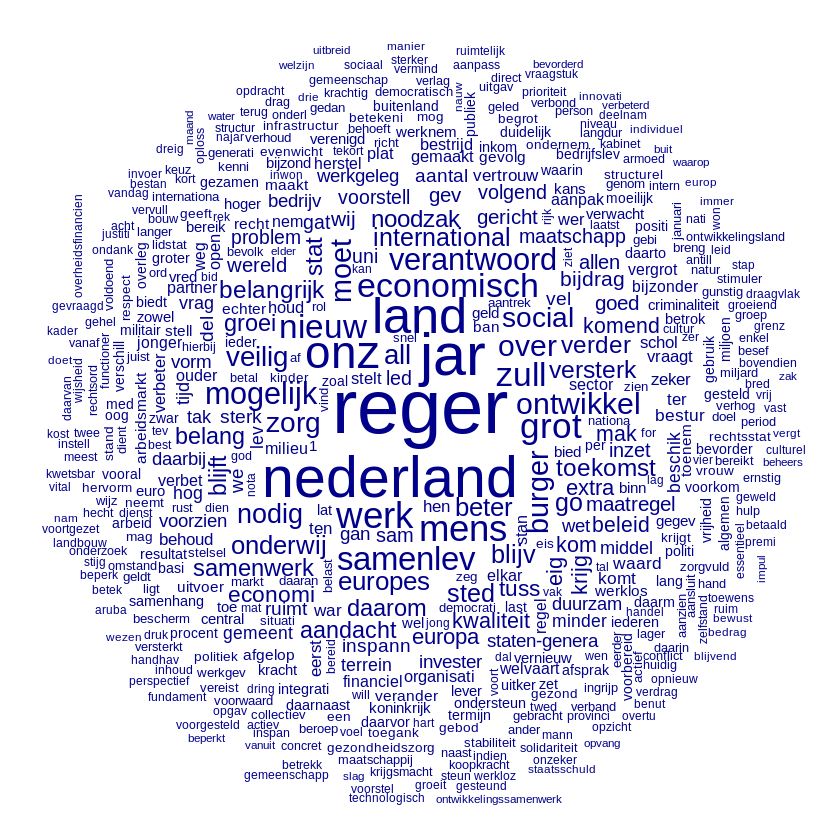

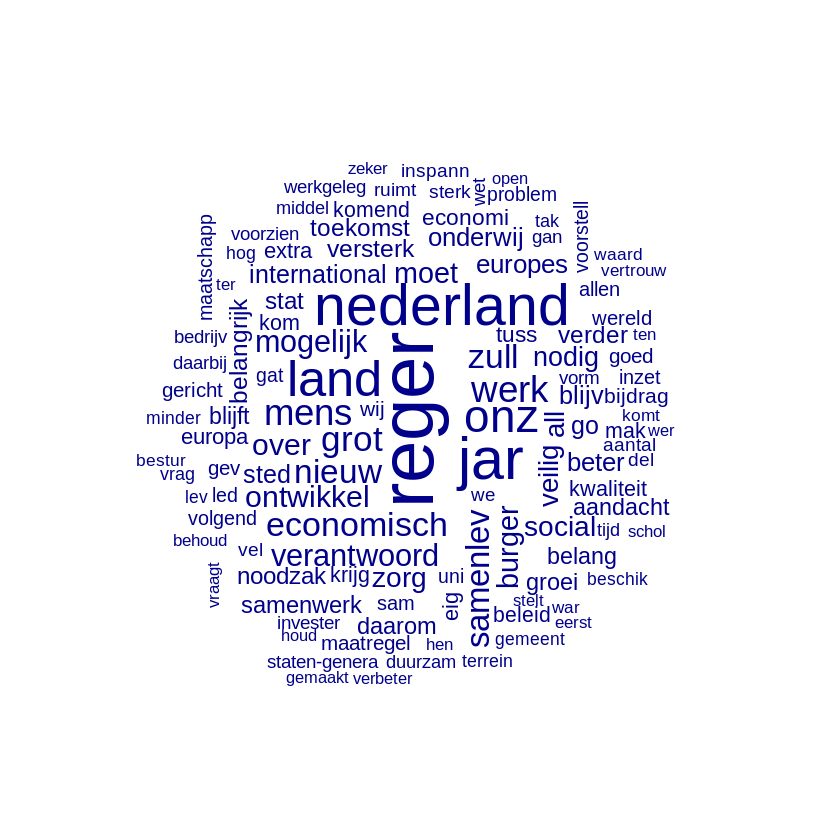

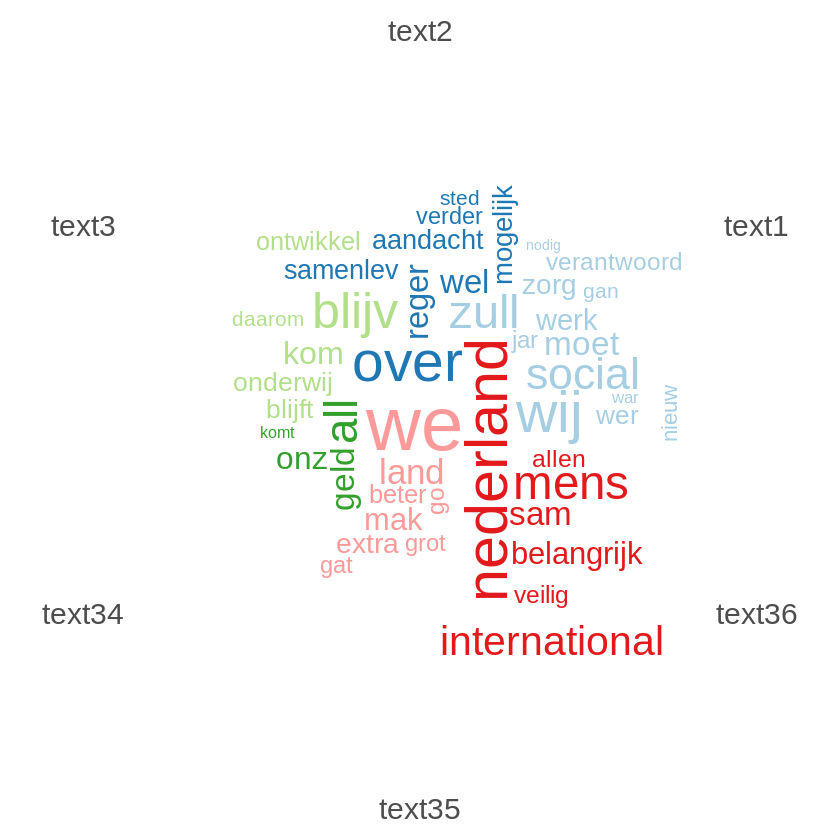

In [26]:
install.packages('quanteda.textplots')
library(quanteda.textplots)
textplot_wordcloud(dtm)
textplot_wordcloud(dtm, min_count = 65)
textplot_wordcloud(dtm[c(1:3,34:36),], min_count = 20, comparison = TRUE)

## Document Similarity

With the document-feature matrix, it is straightforward to evaluate the correlation between documents, and thus the document similarity. We see that all the speeches in our dataset have a strong positive correlation.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 1
[1] "text2"
[1] 2
[1] "text1"
[1] 3
[1] "text5"
[1] 4
[1] "text5"
[1] 5
[1] "text11"
[1] 6
[1] "text7"
[1] 7
[1] "text8"
[1] 8
[1] "text7"
[1] 9
[1] "text7"
[1] 10
[1] "text9"
[1] 11
[1] "text15"
[1] 12
[1] "text18"
[1] 13
[1] "text14"
[1] 14
[1] "text13"
[1] 15
[1] "text17"
[1] 16
[1] "text17"
[1] 17
[1] "text15"
[1] 18
[1] "text17"
[1] 19
[1] "text20"
[1] 20
[1] "text19"
[1] 21
[1] "text19"
[1] 22
[1] "text23"
[1] 23
[1] "text22"
[1] 24
[1] "text25"
[1] 25
[1] "text24"
[1] 26
[1] "text19"
[1] 27
[1] "text18"
[1] 28
[1] "text30"
[1] 29
[1] "text31"
[1] 30
[1] "text28"
[1] 31
[1] "text30"
[1] 32
[1] "text36"
[1] 33
[1] "text35"
[1] 34
[1] "text35"
[1] 35
[1] "text33"
[1] 36
[1] "text32"


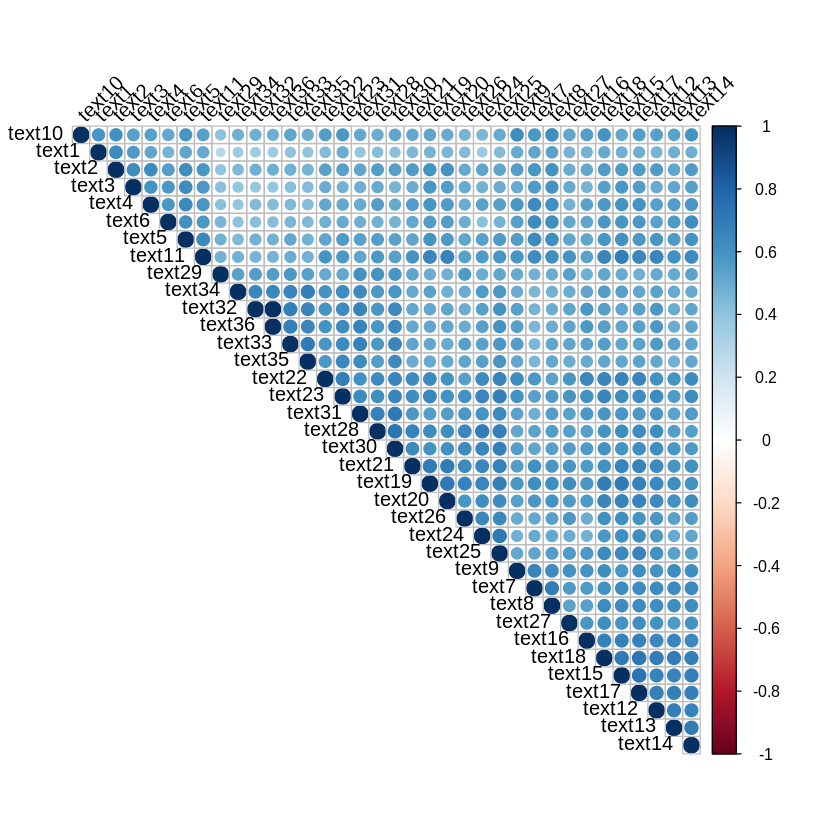

In [27]:
# calculating / visualizing document similarity
install.packages('quanteda.textstats')
library(quanteda.textstats)

res <- as.matrix(textstat_simil(dtm))
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

# doc i is most similar to doc ?
for (i in 1:36){
temp <- res[,-i]
max(temp[i,])
temp[i,]
print(i)
print(colnames(temp)[max.col(as.data.frame(temp[i,, drop = FALSE]))])
}

##Text statistics

Next, we can describe the characteristics of the texts in many different ways

In [28]:
# Determine a readibility score (as a function of Average Sentence Length, number of syllables and number of words)
textstat_readability(troonredes$Tekst)
# please refer to https://quanteda.io/reference/textstat_readability.html for more details


document,Flesch
<chr>,<dbl>
text1,27.29454
text2,24.06664
text3,28.78829
text4,25.44860
text5,22.98067
text6,21.20399
text7,23.95801
text8,25.30565
text9,25.00227


In [29]:
# determine the number of words per document
rowSums(dtm)

text1  text2  text3  text4  text5  text6  text7  text8  text9 text10 text11 
  1037   1109   1347   1268   1221   1097   1421   1417   1439   1440   1435 
text12 text13 text14 text15 text16 text17 text18 text19 text20 text21 text22 
  1048   1304   1401   1365   1349   1200   1261   1282   1284    966    880 
text23 text24 text25 text26 text27 text28 text29 text30 text31 text32 text33 
   810    942    953    782    824    897    761   1057    993   1026   1036 
text34 text35 text36 
   786   1229   1030

In [30]:
# Again, using the original unfiltered and unstemmed text
rowSums(dfm(troonredes$Tekst,                           # input text
                   tolower = TRUE, stem = FALSE,    # set lowercasing and stemming to TRUE
                   remove = stopwords("dutch"), remove_punct = TRUE))

Warning message:
“'dfm.character()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”
Warning message:
“'stem' is deprecated; use dfm_wordstem() instead”


text1  text2  text3  text4  text5  text6  text7  text8  text9 text10 text11 
  1184   1278   1571   1435   1393   1229   1608   1585   1621   1627   1678 
text12 text13 text14 text15 text16 text17 text18 text19 text20 text21 text22 
  1157   1469   1564   1505   1503   1313   1411   1434   1390   1058    955 
text23 text24 text25 text26 text27 text28 text29 text30 text31 text32 text33 
   884   1028   1104    871    908    995    864   1212   1152   1121   1199 
text34 text35 text36 
   897   1450   1129

In [31]:
#select documents above a threshold (minimum) number of words
minimum <- 1000
selection <- rowSums(dfm(troonredes$Tekst,                           # input text
            tolower = TRUE, stem = FALSE,    # set lowercasing and stemming to TRUE
            remove = stopwords("dutch"), remove_punct = TRUE))>=minimum
dtm_selection <- dtm[selection,]
dtm_selection

Warning message:
“'dfm.character()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”
Warning message:
“'stem' is deprecated; use dfm_wordstem() instead”


Document-feature matrix of: 29 documents, 2,261 features (71.57% sparse) and 0 docvars.
       features
docs    led staten-genera kabinet twee jar geled beleid uiteengezet kom behoud
  text1   2             2       4    2  16     2      2           2   6      5
  text2   2             2       0    2  16     1      6           0   3      2
  text3   4             2       2    0  16     1      4           0   8      4
  text4   2             2       1    1  11     1      4           0   3      1
  text5   3             2       0    0  23     3      7           0   7      2
  text6   2             2       3    1  12     1      0           0   3      1
[ reached max_ndoc ... 23 more documents, reached max_nfeat ... 2,251 more features ]

In [32]:
# determine the number of sentences 
tok_sent <- tokenize_sentences(troonredes$Tekst)
cbind(troonredes$Jaar, lengths(tok_sent))

1984,124
1985,123
1986,161
1987,155
1988,140
1989,120
1990,187
1991,159
1992,180
1993,190
1994,185


In [33]:
# Determine the average number of words per sentence
tok_sent <- tokenize_sentences(troonredes$Tekst)
tok_words <- tokenize_words(troonredes$Tekst)
cbind(troonredes$Jaar, lengths(tok_words) / lengths(tok_sent))

1984,18.07258
1985,19.48780
1986,18.83230
1987,18.14194
1988,19.13571
1989,19.59167
1990,16.45455
1991,19.50943
1992,16.84444
1993,16.94211
1994,16.74595


In [34]:
# compare lexical diversity (% unique words)
quanteda.textstats::textstat_lexdiv(dfm(troonredes$Tekst,               # input text
                             tolower = TRUE, stem = FALSE,    # set lowercasing and stemming to TRUE
                             remove = stopwords("dutch"), remove_punct = TRUE), measure = "TTR")

Warning message:
“'dfm.character()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”
Warning message:
“'stem' is deprecated; use dfm_wordstem() instead”


document,TTR
<chr>,<dbl>
text1,0.6279661
text2,0.6418384
text3,0.6064725
text4,0.6386555
text5,0.6086331
text6,0.6592225
text7,0.5855799
text8,0.5918885
text9,0.5988841


## Showing keywords in context

This function allows you to search specific words and see the context in which they were used in the documents.

In [35]:
## Showing 'keywords in context' (kwic)
kwic(troonredes$Tekst, pattern = phrase("economie"), window = 5)
kwic(troonredes$Tekst, pattern = phrase("terreur"), window = 5)
kwic(troonredes$Tekst, pattern = phrase("econom*"), window = 3)
kwic(troonredes$Tekst, pattern = phrase("cris*"), window = 3)

Warning message:
“'kwic.character()' is deprecated. Use 'tokens()' first.”


docname,from,to,pre,keyword,post,pattern
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
text1,2326,2326,maar zeker geraken wij met,economie,en werkgelegenheid uit het slop,economie
text2,12,12,"gunstige wending , die onze",economie,"vorig jaar heeft genomen ,",economie
text2,112,112,hand gaat met een veerkrachtiger,economie,. Voor dat beleid zijn,economie
text2,429,429,heeft het vertrouwen in onze,economie,helpen herstellen . Gelukkig is,economie
text2,877,877,bij het herstel van de,economie,", waardoor meer mensen de",economie
text2,1466,1466,en de kwaliteit van de,economie,. Naast beroepsonderwijs en leerlingwezen,economie
text3,943,943,"is om , nu de",economie,"aantrekt , meer kansen te",economie
text4,850,850,in onze samenleving . Onze,economie,heeft de afgelopen drie jaar,economie
text4,944,944,", gericht op versterking van",economie,en werkgelegenheid op langere termijn,economie


Warning message:
“'kwic.character()' is deprecated. Use 'tokens()' first.”


docname,from,to,pre,keyword,post,pattern
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
text14,2674,2674,alle vormen van geweld en,terreur,. Het respecteren van de,terreur
text21,905,905,pluriforme samenleving te beschermen tegen,terreur,", heeft de regering aangekondigd",terreur
text33,1785,1785,van burgers . Oorlog en,terreur,drijven onschuldige mensen van huis,terreur


Warning message:
“'kwic.character()' is deprecated. Use 'tokens()' first.”


docname,from,to,pre,keyword,post,pattern
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
text1,2240,2240,", culturele en",economische,contacten de ontspanning,econom*
text1,2326,2326,geraken wij met,economie,en werkgelegenheid uit,econom*
text2,12,12,", die onze",economie,vorig jaar heeft,econom*
text2,112,112,met een veerkrachtiger,economie,. Voor dat,econom*
text2,184,184,bij gebrek aan,economisch,draagvlak bedreigd zou,econom*
text2,429,429,vertrouwen in onze,economie,helpen herstellen .,econom*
text2,767,767,Ofschoon weer enige,economische,groei wordt bereikt,econom*
text2,877,877,herstel van de,economie,", waardoor meer",econom*
text2,1466,1466,kwaliteit van de,economie,. Naast beroepsonderwijs,econom*


Warning message:
“'kwic.character()' is deprecated. Use 'tokens()' first.”


docname,from,to,pre,keyword,post,pattern
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
text7,123,123,verwanten . De,crisis,in de Golf-regio,cris*
text7,1068,1068,dan nu de,crisis,in het Midden-Oosten,cris*
text17,2055,2055,van Europa aan,crisisbeheersings-,en vredesoperaties dient,cris*
text18,2274,2274,deel aan internationale,crisisbeheersingsoperaties,", vaak onder",cris*
text18,2352,2352,het vermogen tot,crisisbeheersing,binnen het gezamenlijke,cris*
text20,741,741,2200 militairen in,crisisbeheersingsoperaties,levert Nederland hieraan,cris*
text21,1216,1216,naar de ernstige,crisis,in Soedan .,cris*
text22,790,790,en aan internationale,crisisbeheersingsoperaties,. Bij wederopbouw,cris*
text25,174,174,", ontwikkelingssamenwerking en",crisisbeheersing,onverminderd voort .,cris*


## Comparing the words used in different groups of documents

Warning message:
“'dfm.character()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'groups' is deprecated; use dfm_group() instead”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”


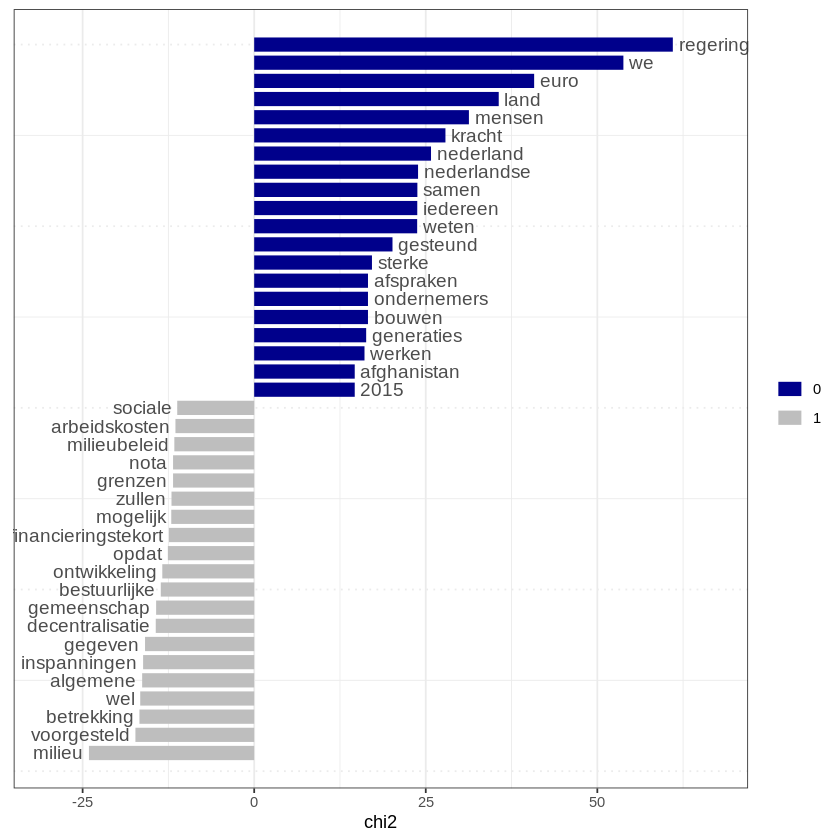

In [36]:
# create DTM that separates pre 2000 from the years after that
troonredes <- c(troonredes, groep = list(as.numeric(troonredes$Jaar<2000)))
dtm_groep = dfm(troonredes$Tekst, groups = troonredes$groep, 
               remove = stopwords("dutch"), remove_punct = TRUE)

# compare target (in this case pre-2000) to rest of DTM (in this case 2000 and after)
keyness = textstat_keyness(dtm_groep) 
# plot which words are more likely to be used in either group
textplot_keyness(keyness)

Warning message:
“'dfm.character()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'groups' is deprecated; use dfm_group() instead”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”


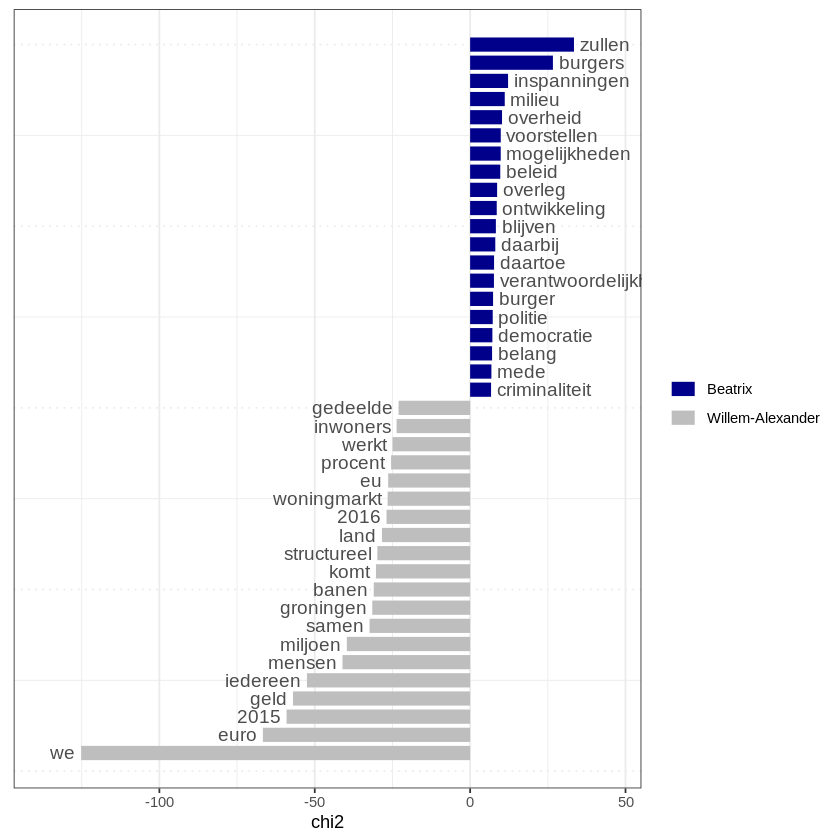

In [37]:
# create DTM that separates speeches by Beatrix from speeches by Willem-Alexander
dtm_spreker = dfm(troonredes$Tekst, groups = troonredes$Spreker, 
                remove = stopwords("dutch"), remove_punct = TRUE)

# compare target (in this case Beatrix) to rest of DTM (in this case Willem-Alexander)
keyness = textstat_keyness(dtm_spreker) 
# plot which words are more likely to be used by the King or the former Queen
textplot_keyness(keyness)

## Counting and Dictionary

Document-feature matrix of: 36 documents, 3 features (22.22% sparse) and 0 docvars.
       features
docs    terreur economie _unmatched
  text1       0       11       1026
  text2       0       13       1096
  text3       0        7       1340
  text4       0       19       1249
  text5       0       15       1206
  text6       0       25       1072
[ reached max_ndoc ... 30 more documents ]

Document-feature matrix of: 6 documents, 3 features (11.11% sparse) and 0 docvars.
        features
docs     terreur economie _unmatched
  text31       0       24        969
  text32       2       11       1013
  text33       3       13       1020
  text34       3        5        778
  text35       0       12       1217
  text36       2       11       1017

Warning message:
“'as.data.frame.dfm' is deprecated.
Use 'convert(x, to = "data.frame")' instead.
See help("Deprecated")”


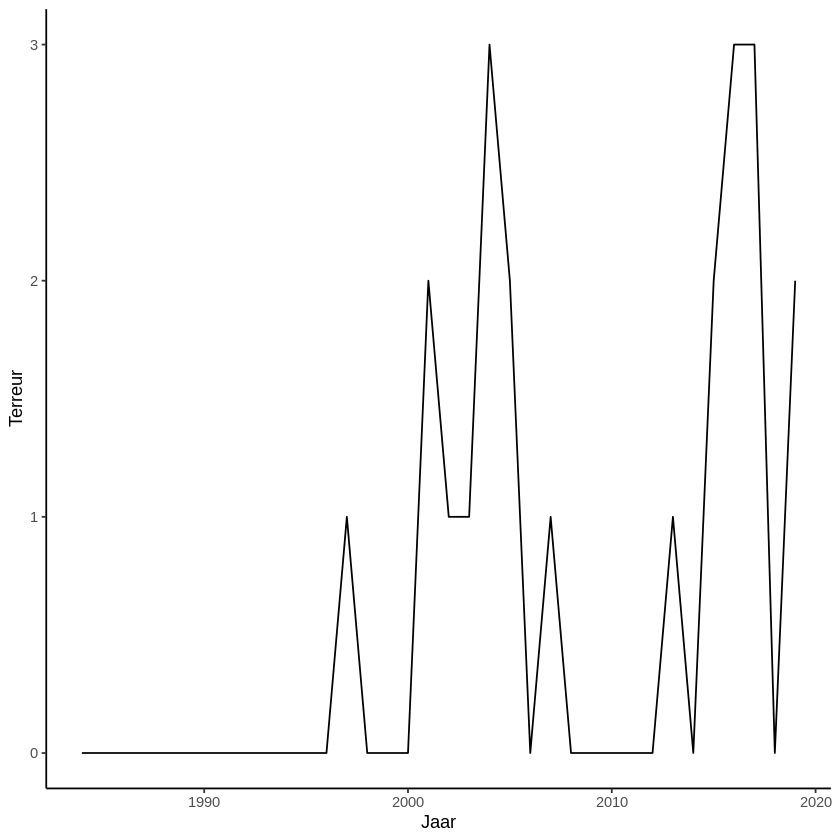

In [38]:
# step 1: define dictionary
myDict <- dictionary(list(terreur = c("terror*", "terreur*"), 
                          economie = c("econom*", "werkgel*", "arbeids*"))) 

# step 2: count
dict_dtm <- dfm_lookup(dtm, myDict, nomatch = "_unmatched") 
dict_dtm
tail(dict_dtm)

# step 3: plot occurrence or terreur
library(ggplot2)
ggplot(data=as.data.frame(dict_dtm), aes(x = 1984:2019, y = terreur))+
        geom_line()+theme_classic()+xlab("Jaar")+ylab("Terreur")

# To Conclude

This notebook showed a glimpse of all the possibilities regarding working with text in R. For other applications, such as supervised and unsupervised learning, and for more general background information, please refer to the article mentioned at the top of this notebook.